In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2


In [ ]:
df = pd.read_csv('../data_cleaned/train_data_cleaned.csv')
df['sentiment'] = df['sentiment'].astype(int)

X = df['tweet'].values
y = df['sentiment'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

y_train += 1

X_train = pd.Series(X_train).fillna('').astype(str)
X_test = pd.Series(X_test).fillna('').astype(str)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

vocab_size = len(tokenizer.word_index) + 1  
max_length = max(len(x.split()) for x in X_train)

X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=max_length, padding='post')
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=max_length, padding='post')

In [64]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length),
    LSTM(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.2),
    LSTM(64, return_sequences=False),
    Dense(64, activation='relu', kernel_regularizer=l2(0.1)),
    Dense(3, activation='softmax') 
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.9/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [65]:
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
history = model.fit(
    X_train_seq, y_train,
    validation_split=0.1,
    epochs=25,
    batch_size=64,
    callbacks=[early_stopping],
    verbose=2
)

Epoch 1/25
141/141 - 11s - 78ms/step - accuracy: 0.4560 - loss: 3.7102 - val_accuracy: 0.5055 - val_loss: 1.6704
Epoch 2/25
141/141 - 7s - 53ms/step - accuracy: 0.5489 - loss: 1.1928 - val_accuracy: 0.5385 - val_loss: 1.0188
Epoch 3/25
141/141 - 7s - 53ms/step - accuracy: 0.6178 - loss: 0.8740 - val_accuracy: 0.5415 - val_loss: 1.0077
Epoch 4/25
141/141 - 8s - 53ms/step - accuracy: 0.6912 - loss: 0.7546 - val_accuracy: 0.5445 - val_loss: 0.9955
Epoch 5/25
141/141 - 8s - 53ms/step - accuracy: 0.7630 - loss: 0.6419 - val_accuracy: 0.5564 - val_loss: 1.1144
Epoch 6/25
141/141 - 7s - 53ms/step - accuracy: 0.8181 - loss: 0.5400 - val_accuracy: 0.5514 - val_loss: 1.1745
Epoch 7/25
141/141 - 7s - 53ms/step - accuracy: 0.8515 - loss: 0.4677 - val_accuracy: 0.5534 - val_loss: 1.2223
Epoch 8/25
141/141 - 8s - 54ms/step - accuracy: 0.8777 - loss: 0.4081 - val_accuracy: 0.5604 - val_loss: 1.2086
Epoch 9/25
141/141 - 8s - 54ms/step - accuracy: 0.8961 - loss: 0.3578 - val_accuracy: 0.5554 - val_loss

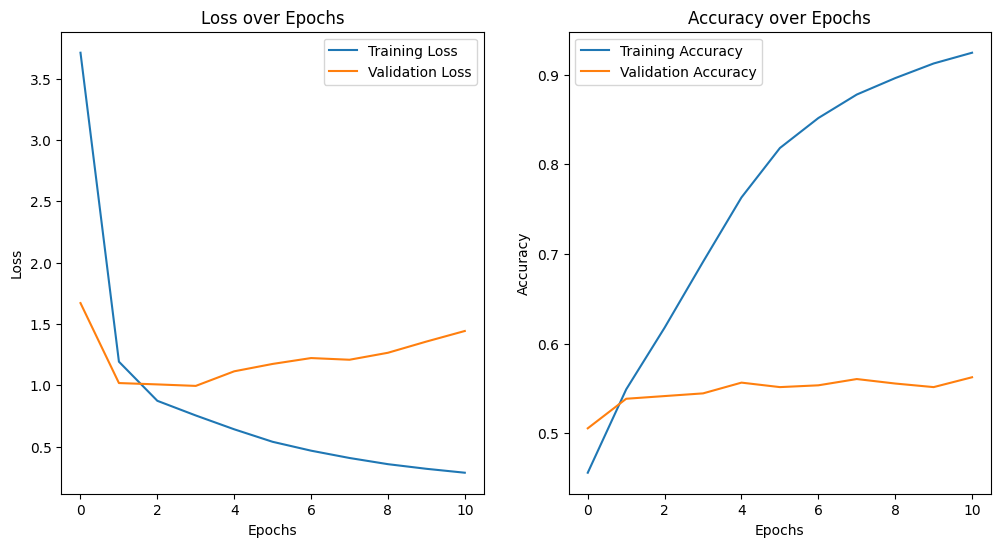

In [66]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [67]:
test_loss, test_accuracy = model.evaluate(X_test_seq, y_test + 1, verbose=2)
print(f"Test Accuracy: {test_accuracy:.4f}")

35/35 - 0s - 13ms/step - accuracy: 0.5764 - loss: 0.9533
Test Accuracy: 0.5764
